# Time Series Forecasting of Joshua Tree National Park Temperature

Alex Rivera ID#011243153

Western Governors University

D214: Data Analytics Graduate Capstone

January 29, 2024

## A: Research Question

The research question for the project is, "To what extent can the daily average temperature of Joshua Tree National Park be predicted?"

Joshua Tree National Park is located in Southeastern California, it is made up of two distinct deserts spanning over 795,156 acres protected since 1936. The Colorado and Mojave deserts make up the park's ecosystem and are the habitat of the Yucca brevifolia commonly known as Joshua Tree which the park is named after. While the park's land has been protected since 1936 the risk of climate change still puts the park at risk, over the past century Joshua Tree National Park has been getting drier and hotter. According to the National Park Service, “From 1895 to 2016, the average temperature increased by 3℉, these changes impact our landscape, our species, and our visitors” (Climate change, 2023). An 8℉ increase could make it unsuitable for Joshua trees to inhabit 90 percent of the Southwestern park. Wildlife will need to adapt to higher elevations due to an increase in temperature from losing lower elevations habitats, research suggests a 5℉ increase could leave 80 percent of the park uninhabitable (Climate change, 2023). Visitors are at risk due to excessive heat which causes dehydration and heat-related illness, additional rangers can be implemented during periods of excessive heat. Having an effective method to predict the temperature and future increase will allow for planning for any impacts on Joshua Trees, wildlife, and visitors. A time series forecasting model is an analysis tool that will assist in the prediction of temperature. The project has established the following null and alternate hypotheses: 

#### Null hypothesis

A time series model cannot be created to predict the daily average temperature with a Mean Absolute Percentage Error (MAPE) of less than 10% with the project dataset.                          

#### Alternate Hypothesis 

A time series model can be created to predict the daily average temperature with a Mean Absolute Percentage Error (MAPE) of less than 10% with the project dataset.

## B: Data Collection

The project dataset chosen for the time series analysis is the meteorological "daily_TEMP" dataset (2018-2022) found on the Environmental Protection Agency pre-generated data files website (Pre-Generated Data Files, 2023). Five years' worth of time series data was chosen in total for the training and test splits. 2023 was omitted as the full year had not been published as of the writing of the analysis. The five published datasets had 1,484,579 observations of daily temperature averages of multiple instrument collection sites throughout the United States. The dataset is made up of 29 columns which include descriptive information of the location and way of measurement for the daily output row.

The variable and data types of the dataset are found below:

* State Code - Qualitive
* County Code - Qualitive
* Site Num - Qualitive
* Parameter Code - Qualitive
* POC - Qualitive
* Latitude - Quantitate
* Longitude - Quantitate
* Datum - Qualitive
* Parameter Name - Qualitive
* Sample Duration - Qualitive
* Pollutant Standard - Qualitive
* Date Local - Quantitate
* Units of Measure - Qualitive
* Event Type - Qualitive
* Observation Count - Quantitate
* Observation Percent - Quantitate
* Arithmetic Mean - Quantitate
* 1st Max Value - Quantitate
* 1st Max Hour - Quantitate
* AQI - Qualitive
* Method Code - Qualitive
* Method Name - Qualitive
* Local Site Name - Qualitive
* Address - Qualitive
* State Name - Qualitive
* County Name - Qualitive
* City Name - Qualitive
* CBSA Name - Qualitive
* Date of Last Change - Qualitive

The main data collection advantage is that the Environmental Protection Agency publicly publishes annual daily summary files twice a year. The portal provides an in-depth description of the following, "each table entry has the file name, linked to the file, the size of the (zipped) file, the number of data rows in the file, and the date the file was last modified" (Pre-Generated Data Files, 2023). To collect the data needed for the project all five zipped files were downloaded and CSVs upacked ahead of the data extraction. 

While the data collection was straightforward the disadvantage of the data-gathering was being dependent on the data the Environmental Protection Agency published. This could mean that the datasets had missing dates or instruments due to their collection methods, data quality was dependent on what was published. To overcome this exploratory data analysis was performed to verify quality for nulls or changes to data collection. For the local site "Joshua Tree NP - Black Rock" selected for the analysis this was verified to not be an issue.

## C: Data Extraction and Preparation

#### Justification of Tools

The Python programming language and Jupyter Notebook environment were some of the key tools used throughout the project. Python is a high-level programming language that focuses on readability and simple syntax. Python was chosen due to the extensive packages available and the ability to write effective code in fewer lines. A Jupyter Notebook is an interactive application that allows for writing code, exploring data, visualizing finds, and adding markdown notes. The combination of Python code written in a Jupyter Notebook makes for a great workflow for a data analysis project. 

Working with data was made possible throughout the project because of the following Python packages Pandas, Numpy, and Matplotlib. The Pandas library is used for data manipulation and analysis. Pandas allowed for the data to be: 5 files to be loaded, concatenated into a single dataframe, printed out data structures, filtered, and formated into time series data. The NumPy library was leveraged for working with arrays and mathematical functions. Matplotlib is a plotting library used for data exploration and visualization. The visualizations needed for the project were minimal so the extensive list of visuals in the package is adequate. The advantage of using these tools together is that they are essentially industry standards for working with data and are either built upon or an extension of Numpy. The disadvantage of working with industry standards is the tools are the leading edge of Python libraries, for this project all the functions within the packages are sufficient for the analysis.
 
The Warnings Python library was leveraged to manage any warning given while running the analysis code. A warning is not an error, so it does not interrupt the running of any code. The advantage of using it is having the ability to suppress any warnings of obsolete libraries or noncritical warnings. The disadvantage of the code is while ignoring warnings you could miss an upgrade or run a workaround to fix any issues. 

The analysis and time series modeling were implemented with the Statsmodels and Pmdarima libraries. Statsmodels is a module that provides the ability to run many different statistical calculations and models. Statsmodels was utilized for: the Augmented Dickey–Fuller test, verifying seasonality and running the autoregressive integrated moving average(ARIMA) model. Pmdarima is another statistical library that offers time series analysis capabilities. Pmdarima was utilized for its auto_arima function which chooses the best model based on an AIC score. The advantage of using this combination is using the best functions within the libraries, and allowing for the selection of the best model with minimal additional analysis. The main disadvantage of this combination is relying on auto_arima versus hypertunning parameters which would take much longer to test out. 

The Scikit-Learn library is a highly efficient and powerful machine-learning library. It was developed using NumPy and Matplotlib, which makes it very compatible with these libraries for analysis purposes. The library was used for model selection and metrics functions, and it also helped split the dataset into training and testing data. The MAPE metric was used to quantify the hypothesis, which was derived from Scikit-Learn. The main benefit of using Scikit-Learn is its user-friendliness, as it was specifically developed with machine learning workflows in mind. For this analysis, there were no real disadvantages to using this library.  

#### Justification of Techniques

The following section will justify the data extraction and preparation techniques. An advantage and disadvantage of the technique will be provided where possible. 

The section below is importing all the necessary libraries and tools justified in the previous section.  

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

The five EPA daily temp CSV files were loaded into data frames to create the project dataset. All the datasets had an identical structure so the data frames were concatenated into a single dataframe for analysis. Panda's function info() was utilized to get the total entries of 1,484,579 observations, 29 columns, and data types. The advantage of the method utilized is the minimal amount of lines needed to extract the information for the analysis. Minimal disadvantages to the data extraction method as all other coding would be similar in length and more complicated.

In [2]:
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
DF2018 = pd.read_csv('C:/Users/alexa/WGU/D214/Project/daily_TEMP_2018.csv')
DF2019 = pd.read_csv('C:/Users/alexa/WGU/D214/Project/daily_TEMP_2019.csv')
DF2020 = pd.read_csv('C:/Users/alexa/WGU/D214/Project/daily_TEMP_2020.csv')
DF2021 = pd.read_csv('C:/Users/alexa/WGU/D214/Project/daily_TEMP_2021.csv')
DF2022 = pd.read_csv('C:/Users/alexa/WGU/D214/Project/daily_TEMP_2022.csv')
times = pd.concat([DF2018,DF2019,DF2020,DF2021,DF2022])

times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484579 entries, 0 to 281045
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   State Code           1484579 non-null  int64  
 1   County Code          1484579 non-null  int64  
 2   Site Num             1484579 non-null  int64  
 3   Parameter Code       1484579 non-null  int64  
 4   POC                  1484579 non-null  int64  
 5   Latitude             1484579 non-null  float64
 6   Longitude            1484579 non-null  float64
 7   Datum                1484579 non-null  object 
 8   Parameter Name       1484579 non-null  object 
 9   Sample Duration      1484579 non-null  object 
 10  Pollutant Standard   0 non-null        float64
 11  Date Local           1484579 non-null  object 
 12  Units of Measure     1484579 non-null  object 
 13  Event Type           1484579 non-null  object 
 14  Observation Count    1484579 non-null  int64  
 15 

To filter and extract the observations needed for the time series analysis the Panda's loc[] function was utilized. The state name was filtered to equal California and the local site name to equal Joshua Tree NP - Black Rock. Once the two filters were applied a dataset of 1,823 daily average temperature observations were left in the dataset. The Joshua Tree Black Rock location was chosen due to it being within the park and in the Mojave desert. The advantage of this method is it's a simple method that allows slicing the necessary observations in two lines of code. Multiple lines of code and not chaining might be a disadvantage to some users, the method below in my opinion is more readable. 

In [3]:
times = times.loc[times['State Name'] == 'California']
times = times.loc[times['Local Site Name'] == 'Joshua Tree NP - Black Rock']
times

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
48858,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2018-01-01,Degrees Fahrenheit,None,24,100.0,51.250000,62.0,12,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2019-03-04
48859,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2018-01-02,Degrees Fahrenheit,None,24,100.0,52.916667,64.0,12,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2019-03-04
48860,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2018-01-03,Degrees Fahrenheit,None,24,100.0,50.375000,58.0,11,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2019-03-04
48861,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2018-01-04,Degrees Fahrenheit,None,24,100.0,55.083333,66.0,13,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2019-03-04
48862,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2018-01-05,Degrees Fahrenheit,None,24,100.0,56.041667,66.0,12,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2019-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42572,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2022-12-27,Degrees Fahrenheit,None,24,100.0,55.500000,60.0,11,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2023-03-16
42573,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2022-12-28,Degrees Fahrenheit,None,24,100.0,49.333333,60.0,12,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2023-03-16
42574,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2022-12-29,Degrees Fahrenheit,None,24,100.0,45.416667,50.0,13,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2023-03-16
42575,6,71,9002,62101,1,34.06957,-116.38893,WGS84,Outdoor Temperature,1 HOUR,NaN,2022-12-30,Degrees Fahrenheit,None,24,100.0,45.916667,50.0,11,NaN,41,INSTRUMENTAL - ELEC. OR MACH. AVG. LEVEL 1,Joshua Tree NP - Black Rock,JOSHUA TREE NATIONAL MONUMENT,California,San Bernardino,Not in a city,"Riverside-San Bernardino-Ontario, CA",2023-03-16


Now that the Joshua Tree Black Rock observations have been extracted, the data will need to be prepared for the time series analysis. Two variables are needed for the time series analysis, a date and average daily temperature. From the dataset, the date local and arithmetic mean columns were selected. These two columns were renamed to Day and Avg_Temp to align with their data. The Panda's function to_datetime was used to convert the column to date time data type and set it as the index. The main advantage of these data preparation steps is the ease of implementation because of renaming and conversion are done to columns. The disadvantage is that there are possibly more effective ways of converting and managing the index for time series data, this would need further research to implement benefits if any. 

In [4]:
times = times[['Date Local', 'Arithmetic Mean']]
times = times.rename(columns={"Date Local": "Day", "Arithmetic Mean": "Avg_Temp"})
times['Day'] = pd.to_datetime(times['Day'])
times.set_index('Day', inplace=True)

The final prepared time series dataframe is printed below.

In [5]:
times

,Avg_Temp
Day,
2018-01-01,51.250000
2018-01-02,52.916667
2018-01-03,50.375000
2018-01-04,55.083333
2018-01-05,56.041667
...,...
2022-12-27,55.500000
2022-12-28,49.333333
2022-12-29,45.416667


## D: Analysis

The data extraction and preparation are now complete and ready for the analysis of the dataset. A justification will be provided for the techniques along with an advantage and disadvantage were possible.

#### Exploratory Data Analysis

The first step of the exploratory data analysis process is to check for nulls and run statistics on the Avg_Temp. The function isnull() was run on the data frame to check for any nulls and none were identified. 1,826 observations should be expected for the 2018-2022 data including a leap year, the dataset is made up of 1,823 observations. To further understand the Avg_Temp variable describe() was implemented which provided: a mean of 61.5, min of 28.75, and max of 93.25. These two functions provide a picture that the values are neither 0 nor null, the 3 observations are missing. The EPA daily temp files left these observations from the dataset, treating outliers or missing values with deletion is a common method. The advantage of the methods applied is the quick statistics run on the data to provide a picture ahead of forecasting. The disadvantage of this technique could be the treatment of the missing values, data imputation could be handled in another manner but 3 out of 1,826 observations is a small fraction to chase. 

In [6]:
times.isnull().sum()

Avg_Temp    0
dtype: int64

In [7]:
times['Avg_Temp'].describe()

count    1823.000000
mean       61.549026
std        15.622914
min        28.750000
25%        48.208333
50%        60.500000
75%        76.083333
max        93.250000
Name: Avg_Temp, dtype: float64

Now that the data has been reviewed, the time series will be evaluated by visualizing it. While this section is subjective statistical tests will be ran against the time series. 

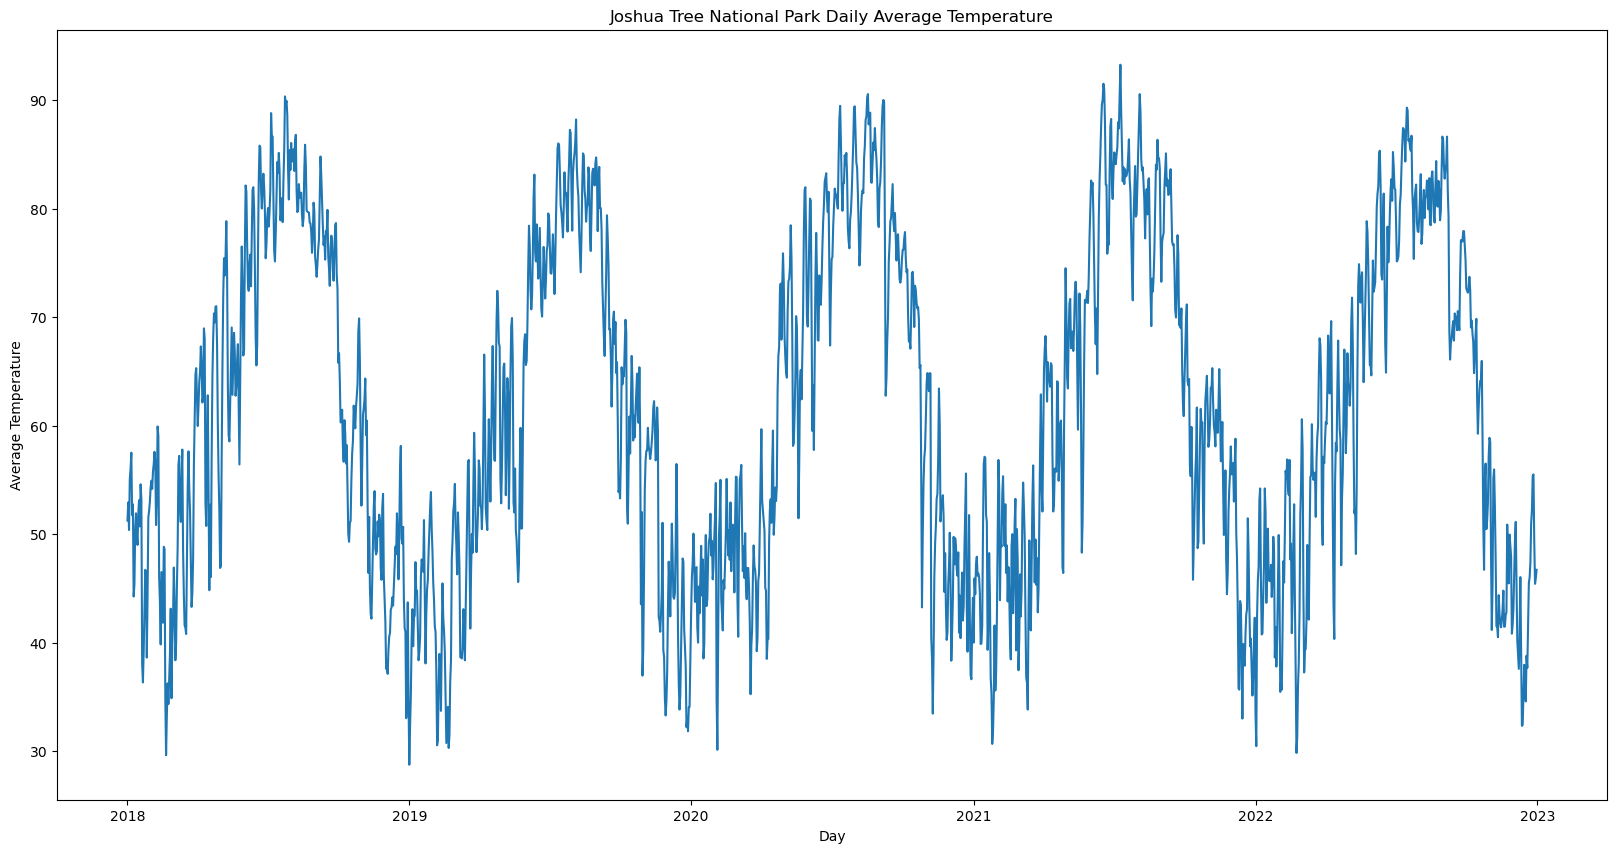

In [8]:
plt.figure(figsize = [20,10])
plt.title('Joshua Tree National Park Daily Average Temperature')
plt.plot(times['Avg_Temp'])
plt.xlabel('Day')
plt.ylabel('Average Temperature')
plt.show()

The time series visualization showed no significant upward or downward trends. The statistical test Augmented Dickey-Fuller (ADF) will be implemented to evaluate the stationarity as presented by the article referenced (Pandian, 2023).

    - Null Hypothesis (H0): Series is non-stationary
    - Alternate Hypothesis (HA): Series is stationary
        - p-value >0.05 Fail to reject (H0)
        - p-value <=0.05 Accept (H1)

The ADF statistic of the dataset was -3.02 and the P-value was 0.03. This led to the conclusion that is stationary. The advantage of running this analysis technique is that the data can be confirmed to not change over time which is important to the time series analysis. No additional differencing and preparation of the dataset is needed. A disadvantage could be while it's not a significant p-value it still isn't zero and the impacts will need to be researched. 

In [9]:
#Article referenced for ADF code(D'Amico, 2023)
adftest = adfuller(times['Avg_Temp'])
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])

ADF-Statistic: -3.0194761127446705
P-Value: 0.03311517432865023


Normally splitting the dataset into training and test datasets is a preprocessing method but the data set could only be modeled once the dataset is confirmed to be stationary. The training and testing were split into 80/20 is a common split to provide enough observations to train on. Shuffle was set to false as the order of the time series data is important to forecasting. 

In [10]:
X_train, X_test = train_test_split(times, test_size=0.2,
                                   shuffle=False ,random_state=2)

The final analysis step ahead of forecasting is to decompose the time series data. This a useful visualization that abstracts the time series into different components. According to an article by Brownlee, these are: 

    - Level: The average value in the series.
    - Trend: The increasing or decreasing value in the series.
    - Seasonality: The repeating short-term cycle in the series.
    - Noise: The random variation in the series (Brownlee, 2020).

The advantage of including the decomposition of the time series is that it provides a visualization of the components that make up the time series over the years. You can compare the trend and the residuals during periods of higher variability for deeper insights. The disadvantage to using the decomposition the insights are subjective and other methods should be considered while reviewing the components. Insights from decomposition will be dicussed further in section E.

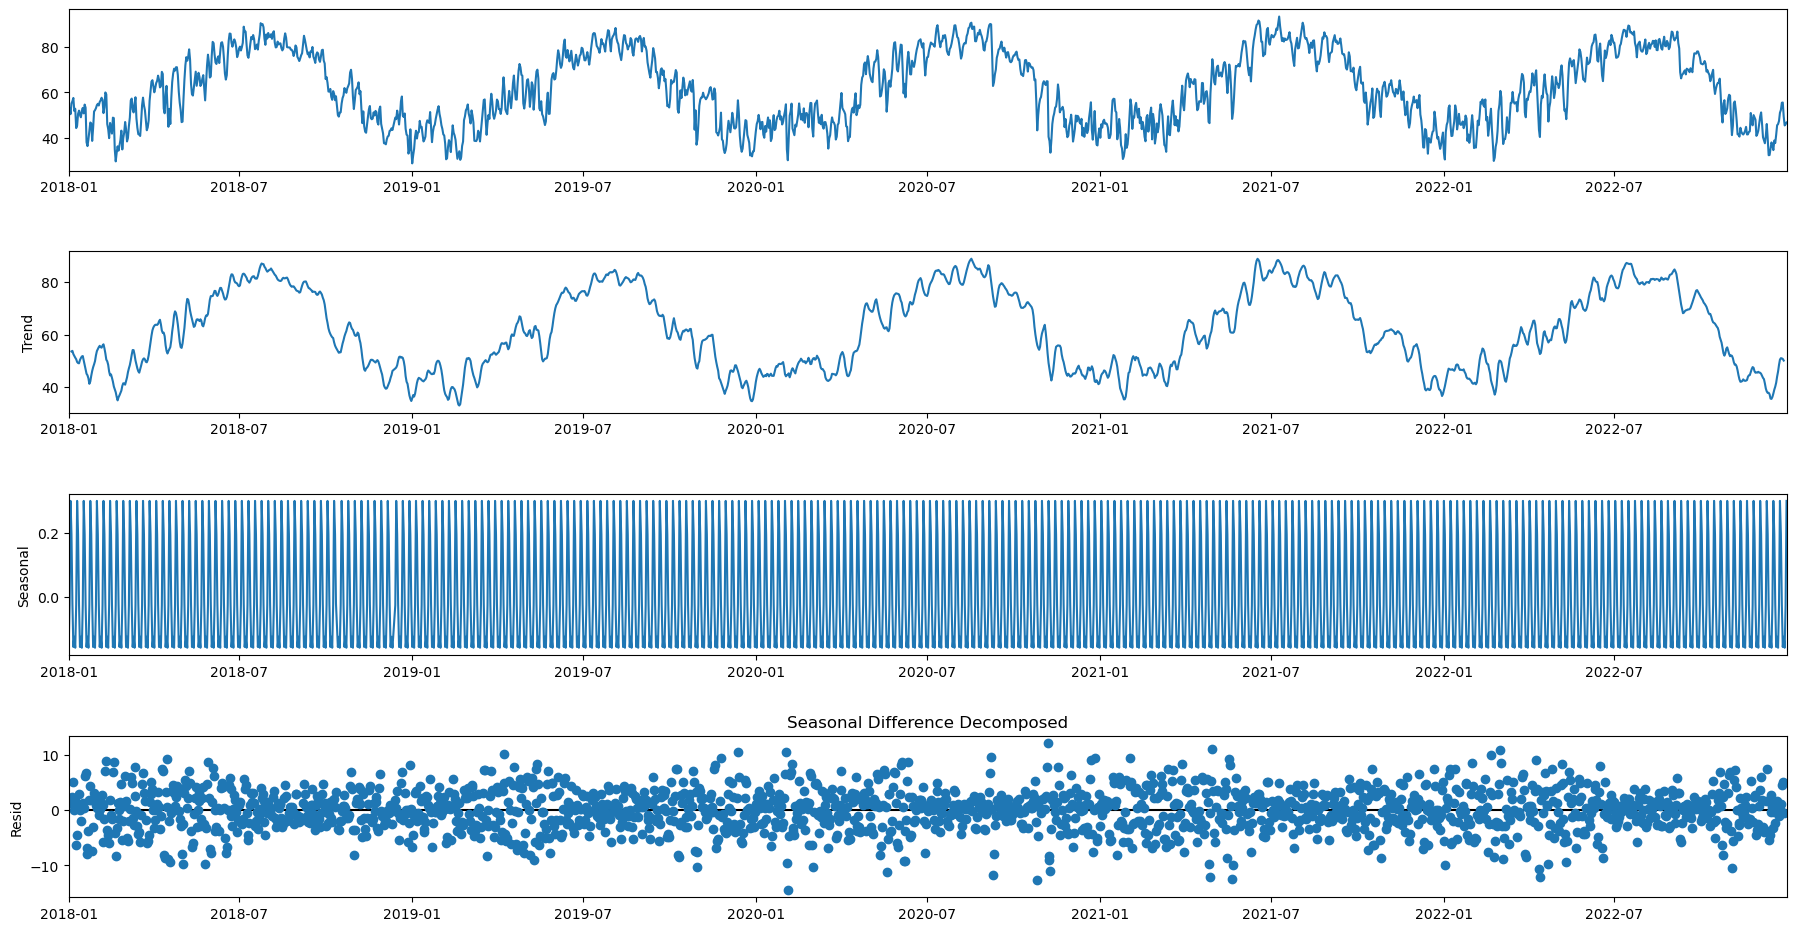

In [11]:
#Article referenced for seasonal_decompose code(Tuychiev, 2023)
times_decomposed = seasonal_decompose(times, period=7)
#Article referenced for times_decomposed code(Elleh, 2022)
x= times_decomposed.plot()
x.set_size_inches((20, 10))
plt.title('Seasonal Difference Decomposed')
plt.show()

#### Forecasting

The exploratory data analysis is now complete and the forecasting portion of the analysis will be completed by the combination of Pmdarima auto_arima and Statsmodels ARIMA. Auto_arima will be utilized to choose the optimal model. According to the documentation, "In order to find the best model, auto_arima optimizes for Akaike Information Criterion and returns the ARIMA which minimizes the value"(Smith, 2018). AIC is a statistical test to compare models for goodness of fit. The best model output of auto_arima will be fit into Statsmodels ARIMA to forecast predictions within the library. The advantage of using this combined method to fit the model is that auto_arima accomplishes the heavy lifting of optimizing for the best model and using the best features of Statsmodels ARIMA to predict later. The disadvantage is performing a stepwise search in auto_arima is a CPU-intensive operation to run, this would need to be accounted for on other hardware. The best model chosen by auto_arima was ARIMA(3,0,3)(0,0,0)[0] intercept with an AIC score of 8162.072. 

In [12]:
#Webniar 2 referenced for auto_arima (Sewell, 2023)
auto_fit=auto_arima(X_train["Avg_Temp"],trace=True, suppress_warnings=True)
auto_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8173.931, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12154.708, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8342.397, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10565.841, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16242.950, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8250.587, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8267.162, Time=0.63 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8168.876, Time=1.20 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=8172.692, Time=1.03 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8162.072, Time=1.07 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8167.111, Time=0.91 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8172.844, Time=1.74 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8164.057, Time=1.44 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept  

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1458
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -4073.036
Date:                Mon, 29 Jan 2024   AIC                           8162.072
Time:                        23:24:19   BIC                           8204.351
Sample:                             0   HQIC                          8177.845
                               - 1458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3304      0.207      1.598      0.110      -0.075       0.736
ar.L1          0.7915      0.106      7.503      0.000       0.585       0.998
ar.L2          0.5976      0.170      3.506      0.000       0.264       0.932
ar.L3         -0.3947      0.083     -4.739      0.000      -0.558      -0.231
ma.L1          0.3286      0.101      3.260      0.001       0.131       0.526
ma.L2         -0.6397      0.075     -8.528      0.000      -0.787      -0.493
ma.L3         -0.3362      0.035     -9.702      0.000      -0.404      -0.268
sigma2        15.5967      0.439     35.531      0.000      14.736      16.457
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               551.46
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.90
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Webniar 2 referenced for ARIMA (Sewell, 2023)
model = ARIMA(X_train["Avg_Temp"], order = (3,0,3),seasonal_order=(0, 0, 0, 0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Avg_Temp   No. Observations:                 1458
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -4073.036
Date:                Mon, 29 Jan 2024   AIC                           8162.072
Time:                        23:24:20   BIC                           8204.351
Sample:                             0   HQIC                          8177.845
                               - 1458                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1159      7.025      8.414      0.000      45.346      72.886
ar.L1          0.7916      0.105      7.504      0.000       0.585       0.998
ar.L2          0.5975      0.170      3.506      0.000       0.264       0.931
ar.L3         -0.3947      0.083     -4.739      0.000      -0.558      -0.231
ma.L1          0.3286      0.101      3.260      0.001       0.131       0.526
ma.L2         -0.6396      0.075     -8.528      0.000      -0.787      -0.493
ma.L3         -0.3362      0.035     -9.704      0.000      -0.404      -0.268
sigma2        15.5974      0.439     35.529      0.000      14.737      16.458
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               551.48
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.90
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now that the time series model has been fit on the training data with the parameters from auto_arima, the predictions will be called for the year 2022 for comparison to the test dataset. The predictions start on the first date of 2022 and end on the last day of 2022. The prediction results that Statsmodel provides is a predicted mean, this output was turned into a dataframe to apply the same data preparation applied to the time series dataset in section C. The final predictions are 365 rows (20% of the original dataset) of the year 2022 which will be used in the overlay visualization and Mean Absolute Percentage Error calculation. Using the Statsmodel library is a major advantage in calling for the get_prediction function took minimal parameters to output the predictions of the time series model created. The disadvantage of this method is the prediction results output has no additional parameters for hypertuning, other libraries could possibly excel in predicting. 

In [14]:
#Article referenced for projection code(Elleh, 2022)
projection = model_fit.get_prediction(start = 1459, end = 1823)
predicted_mean = pd.DataFrame(projection.predicted_mean)
predicted_mean = predicted_mean.rename(columns={'predicted_mean' : 'Avg_Temp'})
predicted_mean = predicted_mean.reset_index()
predicted_mean = predicted_mean.rename(columns={"index": "Day"})
predicted_mean['Day'] = np.arange(len(predicted_mean))

x = pd.to_datetime('2022-01-01')
predicted_mean['Day'] = pd.to_timedelta(predicted_mean['Day'], unit='D') + x
predicted_mean['Day'] = pd.to_datetime(predicted_mean['Day'])
predicted_mean.set_index('Day', inplace=True)
predicted_mean

,Avg_Temp
Day,
2022-01-01,42.649662
2022-01-02,42.539748
2022-01-03,42.564816
2022-01-04,42.608906
2022-01-05,42.702169
...,...
2022-12-27,57.744656
2022-12-28,57.754194
2022-12-29,57.763666


The predictions for 2022 can be overlayed over the original daily averages in the dataset for comparison. The forecasted values are in a red dashed line and the original values are in blue. The forecast does follow the low point of winter and increases along the original daily average till the predictions start to average out. The advantage of visualizing the data is the quick understanding of the predictions compared to a control set. A disadvantage to relying on visualization is that interpretation is subjective, a statistical method of comparing will explored next.

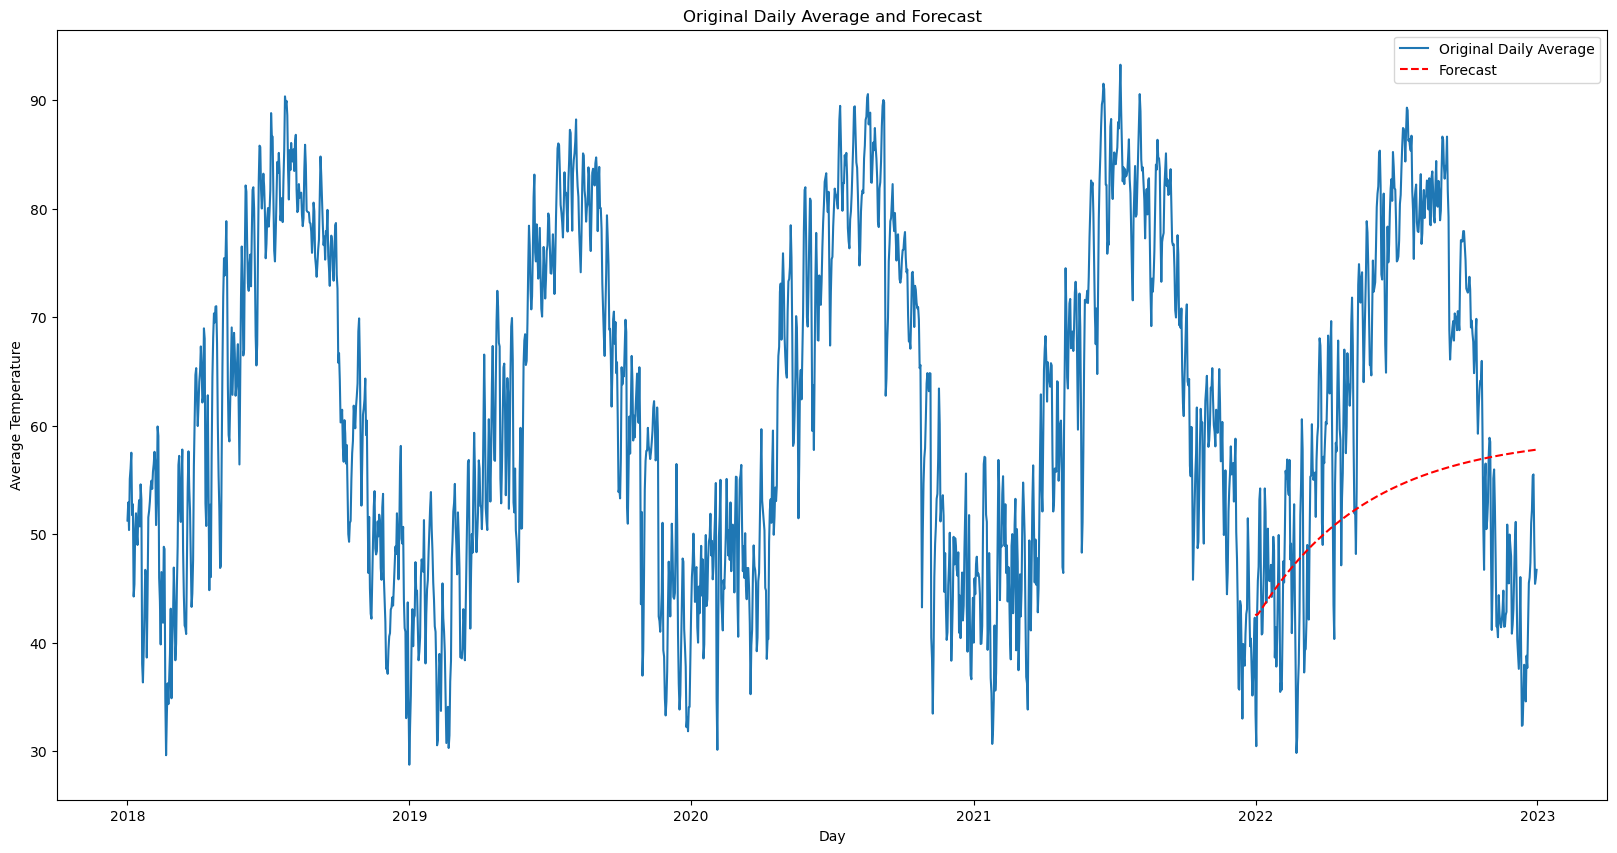

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(times, label='Original Daily Average')
plt.plot(predicted_mean, label='Forecast', color='r',linestyle="--")
plt.xlabel('Day')
plt.ylabel('Average Temperature')
plt.title('Original Daily Average and Forecast')
plt.legend()
plt.show()

The final analysis step is to calculate the error metric to be able to accept or reject the null hypothesis. According to an article by Andres, "Mean Absolute Percentage Error (MAPE) calculates the average percentage difference between the predicted values and the actual values" (Andres, 2023). The advantage of using this error metric is having the ability to interpret in a percentage and compare across different datasets. The disadvantage of MAPE, it is not suitable for overestimations and underestimations due to the calculation, other error metrics would need to be researched. The MAPE was 22.82% when comparing the predicted and original 2022 values. 

In [16]:
#Article referenced for MAPE code(Andres, 2023)
start = times.index.get_loc('2022-01-01')
mape = mean_absolute_percentage_error(times['Avg_Temp'].iloc[start:],
                                      predicted_mean['Avg_Temp'])*100
print("MAPE:", mape, "%")

MAPE: 22.819684409121955 %


## E: Data Summary and Implications

The project began with the following research question in mind, "To what extent can the daily average temperature of Joshua Tree National Park be predicted?" This helped establish the hypotheses below:

**Null hypothesis:** A time series model cannot be created to predict the daily average temperature with a Mean Absolute Percentage Error (MAPE) of less than 10% with the project dataset.                          

**Alternate Hypothesis:** A time series model can be created to predict the daily average temperature with a Mean Absolute Percentage Error (MAPE) of less than 10% with the project dataset.

The best time series model with the lowest AIC had a Mean Absolute Percentage Error (MAPE) of 22.82%. The model does not clear the threshold set by the null hypotheses of 10%, missing it by 12.82%. Due to the results of the error metric, the null hypothesis is accepted and a time series model cannot be created to predict the daily average temperature with a Mean Absolute Percentage Error (MAPE) of less than 10% with the project dataset. The seasonal decomposition of the time series is a really valuable asset for insights into what caused the MAPE to be 22.82%. The trend of the dataset within Joshua Tree National Park starts at low values and increases into summer before decreasing again into winter, this repetitive and predictable trend can be observed yearly. A seasonality pattern can be observed at a much faster rate, roughly about a weekly cycle. These two components can explain a portion of the variability of the time series, allowing for better predictions. The final component is the noise or residuals, variability can be seen throughout the time series in the high and low valleys of average daily temperature. This high variability in the time series residuals is what drove the MAPE to increase. 

The main limitation of the analysis is the timeframe of the project dataset. The project dataset used for the time series model was only five years of observations. The climate change National Park Service webpage stated increases in temperatures over the observation of a century. For the five years of use in the project dataset, the Augmented Dickey-Fuller test stated that the time series data was stationary. This leads to the question that possibly more observation can assist in predictions with a decreased MAPE. 

#### Course of Action and Proposed Directions

As far as a course of action, first, it would be to understand what MAPE is acceptable for use in predicting the daily average temperature at Joshua Tree National Park. The hypotheses used 10% as a threshold as an article by Montaño referenced a MAPE of less than 10 as highly accurate forecasting (Montaño, 2013). The article continued to break down different MAPE ranges as 10-20 as good forecasting, 20-50 as reasonable forecasting, and 50 greater as inaccurate forecasting. There's still value in the time series model created in the analysis, having an understanding of what is reasonable variability of the prediction created by the model. If the MAPE range is not accepted, the project dataset timeframe could be extended by the years of published EPA daily temp data and further training can be accomplished. 

To further develop the analysis and take it in a different direction, the EPA daily temp files are made up of different stations throughout the United States. During the data extraction portion, only the Joshua Tree NP - Black Rock location was extracted. The file when originally reviewed had three locations within Joshua Tree National Park, this could lead to different insights from different locations. Another possibility would be comparing the MAPE of the locations or averaging the temperatures throughout the Joshua Tree locations ahead of analysis. 

The final direction proposal is researching and implementing other time series forecasting Python libraries. The combination of Statsmodels and Pmdarima automated a portion of the process but had minimal parameters for forecasting predictions in the tools. A Facebook open-source project Prophet seems to have automated abilities and tuneable forecasts, "The Prophet procedure includes many possibilities for users to tweak and adjust forecasts" (Forecasting at scale, 2023). Hyperparameter tuning could assist in decreasing MAPE and having an overall better to predict the daily average temperature in Joshua Tree National Park.

## F: Sources

Andres, D. (2023, June 24). Error metrics for time series forecasting - ml pills. ML Pills - Machine Learning Pills. https://mlpills.dev/time-series/error-metrics-for-time-series-forecasting/ 

Brownlee, J. (2020, December 9). How to decompose time series data into trend and seasonality. MachineLearningMastery.com. https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/ 

D’Amico, J. (2023, August 16). How to test for stationarity in time series data using Python. Medium. https://medium.com/@JDEconomics/how-to-test-for-stationarity-in-time-series-data-using-python-44d82890aa9d 

Elleh, F. (2022, August). Advanced Data Analytics - Task 1. https://my.wgu.edu/. Retrieved December 5, 2023, from https://srm.file.force.com/servlet/servlet.FileDownload?retURL=https%3A%2F%2Fsrm--c.vf.force.com%2Fapex%2FFDP%2FCommonsExpandedChatter%3Fcode%3DD213&file=00P3x00001mir2aEAA&_CONFIRMATIONTOKEN=VmpFPSxNakF5TXkweE1pMHhPVlF3TmpveE1Ub3pNQzQyTnpOYSxfY2tzUkhoblhkMjZ2a3FEY0hVbVZkSjhLV00zV1BXbXVheHFVZTdyeFFrPSxZVEJoTmpobQ%3D%3D&common.udd.actions.ActionsUtilORIG_URI=%2Fservlet%2Fservlet.FileDownload.

Environmental Protection Agency. (2023, October 26). Pre-Generated Data Files. EPA. https://aqs.epa.gov/aqsweb/airdata/download_files.html#Daily 

Forecasting at scale. Prophet. (2023). https://facebook.github.io/prophet/ 

Montaño, Juan & Palmer, Alfonso & Sesé, Albert & Cajal, Berta. (2013). Using the R-MAPE index as a resistant measure of forecast accuracy. Psicothema. 25. 500-506. 10.7334/psicothema2013.23.

Rivera, Alex. (2023). Task 1: Time Series Modeling. Unpublished manuscript, Western Governors University.

Sewell, W. (2023, December). Advanced Data Analytics - Webinar 3. https://my.wgu.edu/. Retrieved December 5, 2023, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ea04fe77-3e3a-4293-8e9f-af7a00f22a8c. 

Smith, T. G. (2018). PMDARIMA.ARIMA.AUTO_ARIMA. pmdarima.arima.auto_arima - pmdarima 1.0.0 documentation. https://alkaline-ml.com/pmdarima/1.0.0/modules/generated/pmdarima.arima.auto_arima.html 

Tuychiev, B. (2023, February 21). Advanced Time Series Analysis: Decomposition, .... Kaggle. https://www.kaggle.com/code/bextuychiev/advanced-time-series-analysis-decomposition 

U.S. Department of the Interior. (n.d.). Climate change. National Parks Service. https://www.nps.gov/jotr/learn/nature/climate-change.htm 

 